In [2]:
# Adding autoreload will let you edit your package and see the changes without restarting the notebook.

%load_ext autoreload

%autoreload 2

In [3]:
import pandas as pd
from datetime import datetime
import calendar

In [4]:
deliveries = pd.read_json("../data/raw/second/deliveries.jsonl", lines=True)
products = pd.read_json("../data/raw/second/products.jsonl", lines=True)
sessions = pd.read_json("../data/raw/second/sessions.jsonl", lines=True)
users = pd.read_json("../data/raw/second/users.jsonl", lines=True)

## Analiza jakosci danych w zbiorze "deliveries"

In [5]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16056 entries, 0 to 16055
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   purchase_id         16056 non-null  int64 
 1   purchase_timestamp  16056 non-null  object
 2   delivery_timestamp  16056 non-null  object
 3   delivery_company    16056 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 501.9+ KB


In [6]:
deliveries

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company
0,20001,2019-12-30T14:25:31,2020-01-03T14:28:51,620
1,20002,2019-12-30T17:35:47,2020-01-02T17:38:11,516
2,20003,2019-12-31T15:14:01,2020-01-02T15:16:57,516
3,20004,2019-12-31T14:20:20,2020-01-03T14:24:09,620
4,20005,2019-12-31T04:02:00,2020-01-04T04:05:25,360
...,...,...,...,...
16051,36052,2021-01-01T16:44:14,2021-01-06T16:45:17,360
16052,36053,2021-01-03T17:25:05,2021-01-08T17:29:49,360
16053,36054,2021-01-01T15:28:42,2021-01-03T15:30:55,360
16054,36055,2021-01-01T02:35:51,2021-01-03T02:36:30,620


In [7]:
deliveries['purchase_timestamp'].agg(['min', 'max'])

min    2019-08-01T04:31:06
max    2021-12-20T11:03:23
Name: purchase_timestamp, dtype: object

In [8]:
deliveries['delivery_company'].value_counts()

360    5424
516    5369
620    5263
Name: delivery_company, dtype: int64

#### Number of deliveries per month

In [9]:
deliveries['delivery_month'] = deliveries['delivery_timestamp'].dropna().apply(lambda x: datetime.fromisoformat(x)).dt.month

<AxesSubplot:>

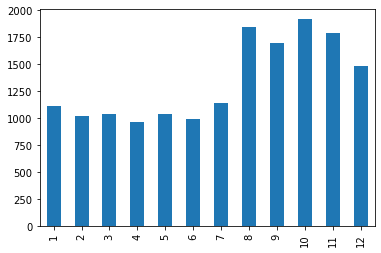

In [10]:
deliveries['delivery_month'].value_counts().sort_index().plot.bar()

## Analiza jakości danych w zbiorze "products"

In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319 entries, 0 to 318
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_id     319 non-null    int64  
 1   product_name   319 non-null    object 
 2   category_path  319 non-null    object 
 3   price          319 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 10.1+ KB


In [12]:
products

,product_id,product_name,category_path,price
0,1001,Telefon Siemens Gigaset DA310,Telefony i akcesoria;Telefony stacjonarne,58.97
1,1002,Kyocera FS-1135MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,2048.50
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.00
3,1004,Fallout 3 (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
4,1005,Szalone Króliki Na żywo i w kolorze (Xbox 360),Gry i konsole;Gry na konsole;Gry Xbox 360,49.99
...,...,...,...,...
314,1315,Jabra Talk,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,54.99
315,1316,Plantronics Voyager Legend,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,249.00
316,1317,Plantronics Savi W740,Telefony i akcesoria;Akcesoria telefoniczne;Ze...,1303.96
317,1318,Plantronics Savi W710,Sprzęt RTV;Audio;Słuchawki,553.00


In [13]:
products[products['price'] < 0]

,product_id,product_name,category_path,price


In [14]:
products[products['price'] < 0].shape[0]

0

In [15]:
products[products['price'] > 5000].sort_values(by='price')

,product_id,product_name,category_path,price
77,1078,Kyocera FS-3540MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,5126.0
80,1081,OKI B840dn,Komputery;Drukarki i skanery;Biurowe urządzeni...,5259.0
79,1080,Kyocera FS-3140MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,5301.9
2,1003,Kyocera FS-3640MFP,Komputery;Drukarki i skanery;Biurowe urządzeni...,7639.0


In [16]:
products[products['price'] > 5000].shape[0]

4

In [17]:
products['category_path'].value_counts()

Gry i konsole;Gry komputerowe                                        202
Gry i konsole;Gry na konsole;Gry Xbox 360                             32
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV                    30
Komputery;Monitory;Monitory LCD                                       17
Komputery;Drukarki i skanery;Biurowe urządzenia wielofunkcyjne         9
Gry i konsole;Gry na konsole;Gry PlayStation3                          9
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy głośnomówiące      5
Telefony i akcesoria;Akcesoria telefoniczne;Zestawy słuchawkowe        4
Telefony i akcesoria;Telefony komórkowe                                2
Sprzęt RTV;Video;Odtwarzacze DVD                                       2
Komputery;Tablety i akcesoria;Tablety                                  2
Sprzęt RTV;Przenośne audio i video;Odtwarzacze mp3 i mp4               2
Telefony i akcesoria;Telefony stacjonarne                              1
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D 

In [18]:
products['main_category'] = products['category_path'].apply(lambda x: x.split(';')[0])
products['main_category'].value_counts()

Gry i konsole           243
Sprzęt RTV               36
Komputery                28
Telefony i akcesoria     12
Name: main_category, dtype: int64

In [19]:
products['second_category'] = products['category_path'].apply(lambda x: x.split(';')[1])
products['second_category'].value_counts()

Gry komputerowe            202
Gry na konsole              41
Video                       33
Monitory                    17
Drukarki i skanery           9
Akcesoria telefoniczne       9
Telefony komórkowe           2
Tablety i akcesoria          2
Przenośne audio i video      2
Telefony stacjonarne         1
Audio                        1
Name: second_category, dtype: int64

#### Min/max price in each category

In [20]:
products[['category_path', 'price']].groupby(by='category_path').agg(['min', 'max'])

price         
                                                        min      max
category_path                                                       
Gry i konsole;Gry komputerowe                          1.00   199.90
Gry i konsole;Gry na konsole;Gry PlayStation3         59.90   129.00
Gry i konsole;Gry na konsole;Gry Xbox 360             14.99   139.99
Komputery;Drukarki i skanery;Biurowe urządzenia...  1998.14  7639.00
Komputery;Monitory;Monitory LCD                      269.00  3029.00
Komputery;Tablety i akcesoria;Tablety               1816.97  2317.02
Sprzęt RTV;Audio;Słuchawki                           553.00   553.00
Sprzęt RTV;Przenośne audio i video;Odtwarzacze ...    64.80    78.90
Sprzęt RTV;Video;Odtwarzacze DVD                     109.00   193.00
Sprzęt RTV;Video;Telewizory i akcesoria;Anteny RTV    29.99   219.00
Sprzęt RTV;Video;Telewizory i akcesoria;Okulary 3D    99.99    99.99
Telefony i akcesoria;Akcesoria telefoniczne;Zes...    86.28   327.47
Telefony i akcesoria;Akcesoria telefoniczne;Zes...    14.99  1303.96
Telefony i akcesoria;Telefony komórkowe              207.33  2199.90
Telefony i akcesoria;Telefony stacjonarne             58.97    58.97

## Analiza jakości danych w zbiorze "sessions"

In [21]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 787245 entries, 0 to 787244
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   session_id        787245 non-null  int64         
 1   timestamp         787245 non-null  datetime64[ns]
 2   user_id           787245 non-null  int64         
 3   product_id        787245 non-null  int64         
 4   event_type        787245 non-null  object        
 5   offered_discount  787245 non-null  int64         
 6   purchase_id       16056 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 42.0+ MB


In [22]:
sessions

,session_id,timestamp,user_id,product_id,event_type,offered_discount,purchase_id
0,124,2019-12-30 13:38:52,109,1161,VIEW_PRODUCT,10,NaN
1,124,2019-12-30 13:41:47,109,1051,VIEW_PRODUCT,10,NaN
2,124,2019-12-30 13:44:13,109,1143,VIEW_PRODUCT,10,NaN
3,124,2019-12-30 13:48:36,109,1154,VIEW_PRODUCT,10,NaN
4,124,2019-12-30 13:51:43,109,1139,VIEW_PRODUCT,10,NaN
...,...,...,...,...,...,...,...
787240,43969,2021-01-02 19:00:46,400,1307,VIEW_PRODUCT,0,NaN
787241,43969,2021-01-02 19:03:42,400,1289,VIEW_PRODUCT,0,NaN
787242,43969,2021-01-02 19:08:03,400,1288,VIEW_PRODUCT,0,NaN
787243,43969,2021-01-02 19:11:26,400,1284,VIEW_PRODUCT,0,NaN


In [23]:
sessions['timestamp'].agg(['min', 'max'])

min   2019-08-01 00:16:17
max   2021-12-20 11:03:23
Name: timestamp, dtype: datetime64[ns]

In [24]:
sessions[['event_type']].value_counts()

event_type  
VIEW_PRODUCT    771189
BUY_PRODUCT      16056
dtype: int64

In [25]:
buy_sessions = sessions[sessions['event_type'] == 'BUY_PRODUCT']

In [26]:
buy_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16056 entries, 132 to 787205
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   session_id        16056 non-null  int64         
 1   timestamp         16056 non-null  datetime64[ns]
 2   user_id           16056 non-null  int64         
 3   product_id        16056 non-null  int64         
 4   event_type        16056 non-null  object        
 5   offered_discount  16056 non-null  int64         
 6   purchase_id       16056 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1003.5+ KB


### Histogram which shows how many times products were sold

Text(0, 0.5, 'Products count')

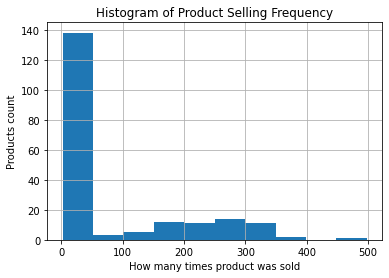

In [91]:
import pylab as pl

num_of_each_product_sold = buy_sessions['product_id'].value_counts().to_frame().reset_index().rename(columns={'product_id': 'sold_count', 'index': 'product_id'})

num_of_each_product_sold.hist(column='sold_count')
pl.title("Histogram of Product Selling Frequency")
pl.xlabel("How many times product was sold")
pl.ylabel("Products count")

In [92]:
pd.cut(num_of_each_product_sold['sold_count'], bins=20).value_counts()

(1.504, 26.8]     117
(26.8, 51.6]       21
(150.8, 175.6]      8
(274.8, 299.6]      8
(200.4, 225.2]      7
(299.6, 324.4]      6
(250.0, 274.8]      6
(126.0, 150.8]      5
(324.4, 349.2]      5
(175.6, 200.4]      4
(225.2, 250.0]      4
(51.6, 76.4]        2
(76.4, 101.2]       1
(349.2, 374.0]      1
(374.0, 398.8]      1
(473.2, 498.0]      1
(101.2, 126.0]      0
(398.8, 423.6]      0
(423.6, 448.4]      0
(448.4, 473.2]      0
Name: sold_count, dtype: int64

In [93]:
num_of_each_product_sold

,product_id,sold_count
0,1045,498
1,1076,379
2,1043,364
3,1030,340
4,1042,339
...,...,...
192,1151,3
193,1157,3
194,1158,3
195,1163,2


### Number of sessions over different time periods

#### Number of all sessions per month

In [28]:
sessions['session_month'] = sessions['timestamp'].dropna().dt.month

<AxesSubplot:>

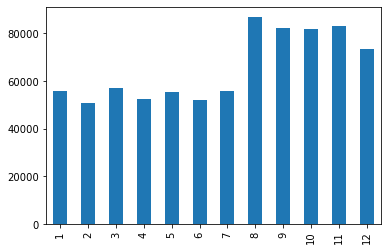

In [29]:
sessions['session_month'].value_counts().sort_index().plot.bar()

#### Number of buy_product sessions per month

In [30]:
buy_sessions['session_month'] = buy_sessions['timestamp'].dropna().dt.month

/tmp/ipykernel_25299/1442752891.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_sessions['session_month'] = buy_sessions['timestamp'].dropna().dt.month


<AxesSubplot:>

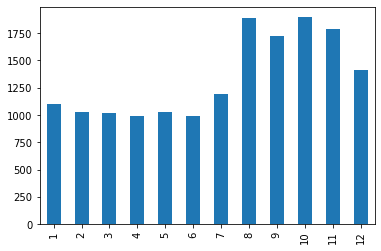

In [31]:
buy_sessions['session_month'].value_counts().sort_index().plot.bar()

#### Number of all sessions per week

In [32]:
sessions['session_week'] = sessions['timestamp'].dropna().dt.week

/tmp/ipykernel_25299/3713943274.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  sessions['session_week'] = sessions['timestamp'].dropna().dt.week


<AxesSubplot:>

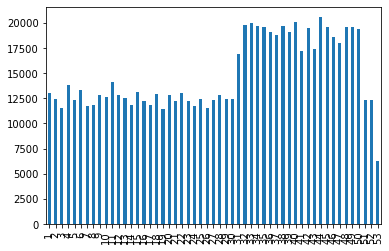

In [33]:
sessions['session_week'].value_counts().sort_index().plot.bar()

#### Number of buy_product sessions per week

In [34]:
buy_sessions['session_week'] = buy_sessions['timestamp'].dropna().dt.week

/tmp/ipykernel_25299/280403240.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  buy_sessions['session_week'] = buy_sessions['timestamp'].dropna().dt.week
/tmp/ipykernel_25299/280403240.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_sessions['session_week'] = buy_sessions['timestamp'].dropna().dt.week


<AxesSubplot:>

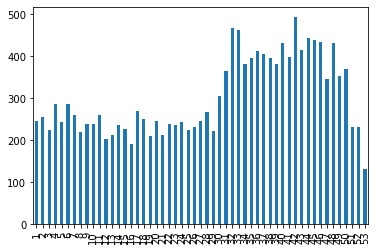

In [35]:
buy_sessions['session_week'].value_counts().sort_index().plot.bar()

#### Number of all sessions per weekday

In [36]:
sessions['session_weekday'] = sessions['timestamp'].dropna().dt.weekday

<AxesSubplot:>

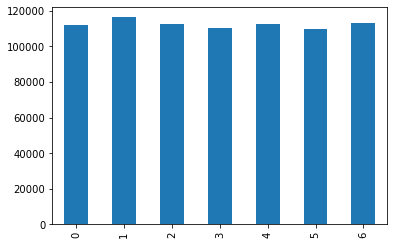

In [37]:
sessions['session_weekday'].value_counts().sort_index().plot.bar()

#### Number of buy_product sessions per weekday

In [38]:
buy_sessions['session_weekday'] = buy_sessions['timestamp'].dropna().dt.weekday

/tmp/ipykernel_25299/2681664498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buy_sessions['session_weekday'] = buy_sessions['timestamp'].dropna().dt.weekday


<AxesSubplot:>

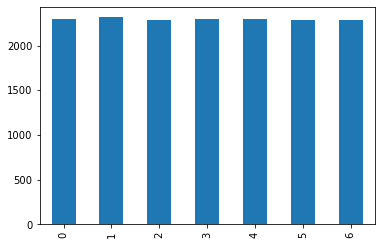

In [39]:
buy_sessions['session_weekday'].value_counts().sort_index().plot.bar()

### TO-DO: How many clients had 1 session, how many had 2 sessions, and so on...

### TO-DO: Discount stats

### TO-DO: How many times each product was bought (each week) - line chart

### TO-DO: How many times category was bought (overall) - line chart

### TO-DO: How many times category was bought (each week) - line chart

## Analiza jakości danych w zbiorze "users"

In [40]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  300 non-null    int64 
 1   name     300 non-null    object
 2   city     300 non-null    object
 3   street   300 non-null    object
dtypes: int64(1), object(3)
memory usage: 9.5+ KB


In [41]:
users

,user_id,name,city,street
0,102,Patryk Wincenciak,Szczecin,aleja Górska 389
1,103,Filip Młocek,Wrocław,ul. Lelewela 88
2,104,Maurycy Pasieczna,Wrocław,aleja Konwaliowa 78
3,105,Eliza Gieroń,Radom,ul. Kossaka 12
4,106,Łukasz Ciepluch,Radom,aleja Środkowa 72/57
...,...,...,...,...
295,397,Sylwia Wąsiewicz,Wrocław,plac Kolejowa 29/17
296,398,Fryderyk Trawka,Radom,ulica Kossaka 98/14
297,399,Marika Ryfa,Warszawa,plac Jagodowa 87
298,400,Adam Łuczkiewicz,Wrocław,ulica Jaskółcza 59


In [42]:
users['city'].value_counts()

Gdynia      51
Radom       48
Szczecin    46
Wrocław     45
Poznań      40
Kraków      39
Warszawa    31
Name: city, dtype: int64

## Check if there are purchases in deliveries which are not in sessions and vice verca

In [43]:
deliveries[~deliveries['purchase_id'].isin(sessions['purchase_id'])]

,purchase_id,purchase_timestamp,delivery_timestamp,delivery_company,delivery_month


In [44]:
sessions[~sessions['purchase_id'].isin(deliveries['purchase_id'])]['event_type'].value_counts()

VIEW_PRODUCT    771189
Name: event_type, dtype: int64